In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np

# Load dataset
file_path = "/content/car data.csv"
df = pd.read_csv(file_path)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


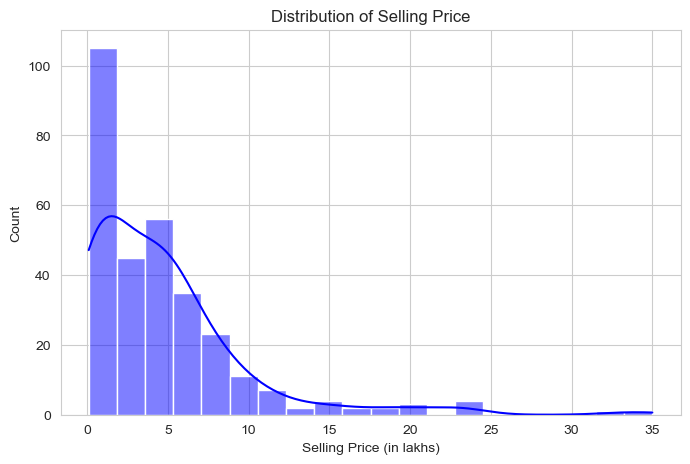

In [13]:
# Data visualization
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], bins=20, kde=True, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Count")
plt.show()

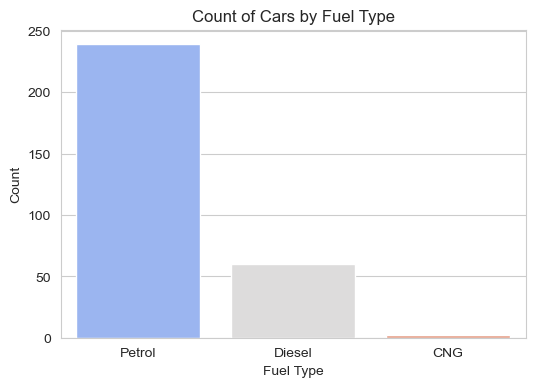

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Fuel_Type"], palette="coolwarm")
plt.title("Count of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

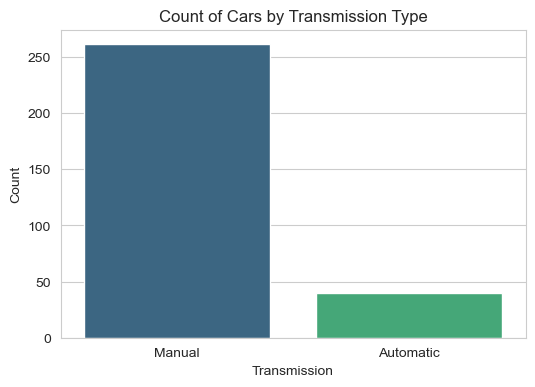

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Transmission"], palette="viridis")
plt.title("Count of Cars by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

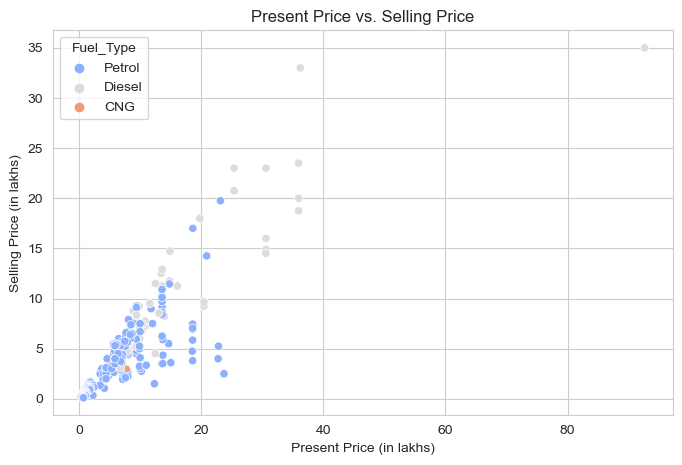

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Present_Price"], y=df["Selling_Price"], hue=df["Fuel_Type"], palette="coolwarm")
plt.title("Present Price vs. Selling Price")
plt.xlabel("Present Price (in lakhs)")
plt.ylabel("Selling Price (in lakhs)")
plt.show()

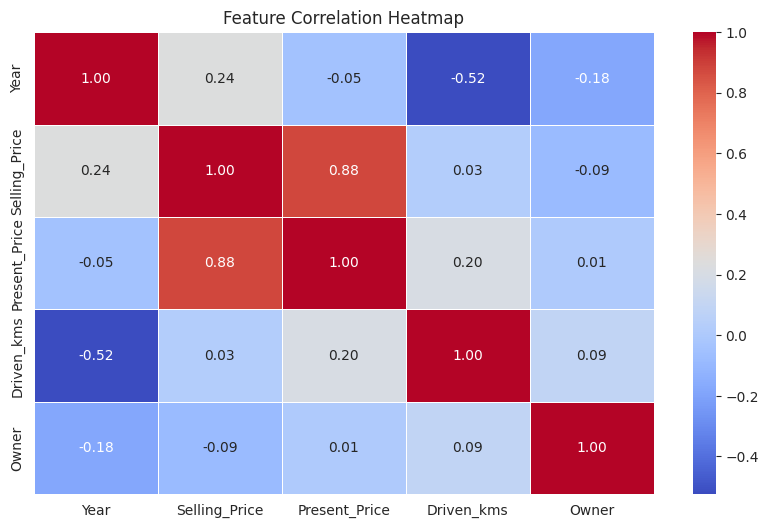

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ["Fuel_Type", "Selling_type", "Transmission"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [13]:
# Selecting features and target variable
X = df_encoded.drop(["Car_Name", "Selling_Price"], axis=1)
y = df_encoded["Selling_Price"]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Predictions
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.85
R² Score: 0.96


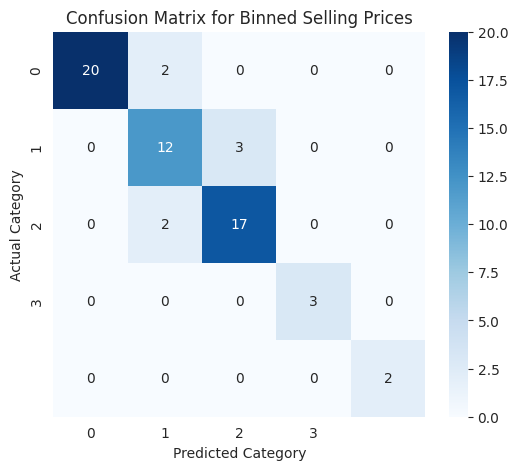

In [18]:
# Confusion Matrix for Binned Prices
bins = [0, 2, 5, 10, 20]
labels = [0, 1, 2, 3]
y_test_binned = np.digitize(y_test, bins, right=True)
y_pred_binned = np.digitize(y_pred, bins, right=True)
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Binned Selling Prices")
plt.show()